In [1]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()

### Veri Seti Hikayesi
<img src="Veri_Seti_Özellikler.png" width="400px">

In [2]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

### ordinal tanımlama

In [6]:
from pandas.api.types import CategoricalDtype

df['cut'].head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [7]:
df['cut'] = df['cut'].astype(CategoricalDtype(ordered=True)) # tipi kategorik değişkene dönüştürüp ordinal bir şekilde sıralı yaptık 

df.dtypes


carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
df['cut'].head(1) #yukarıda ordered özelliğini true yaptıgımız için bu sınıflar arasındaki farkı bize verir

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [9]:
cut_kategoriler = ['Fair' , 'Good' , 'Very Good' , 'Premium' , 'Ideal'] # yukardaki sınıflandırma yanlıs oldugu için kendimiz sıralı liste oluşturduk

In [10]:
df['cut'] = df['cut'].astype(CategoricalDtype(categories=cut_kategoriler , ordered = True)) # kategorileri kendimiz verip sırasını belirlettik
df['cut'].head() # çıktıda görüleceği üzere sınıf farklarını doğrğu sıraladı

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

### BarPlot

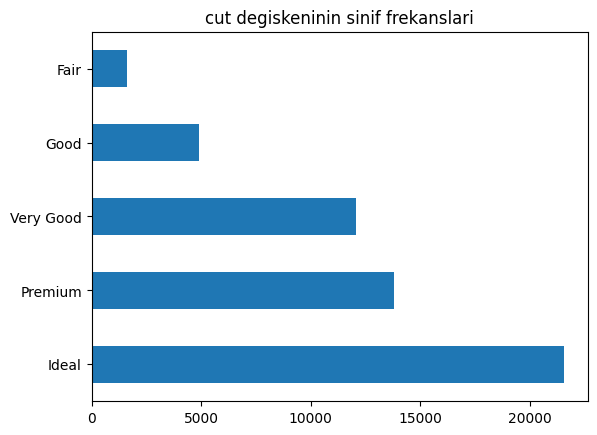

In [11]:
(df['cut']
.value_counts() 
.plot.barh() # bar grafik çizdirme
.set_title('cut degiskeninin sinif frekanslari')); # sonuna ';' konuldugunda baştaki axis bilgileri silinir sadece grafik gösterilir

### Seaborn ile Bar Grafik

<Axes: xlabel='cut'>

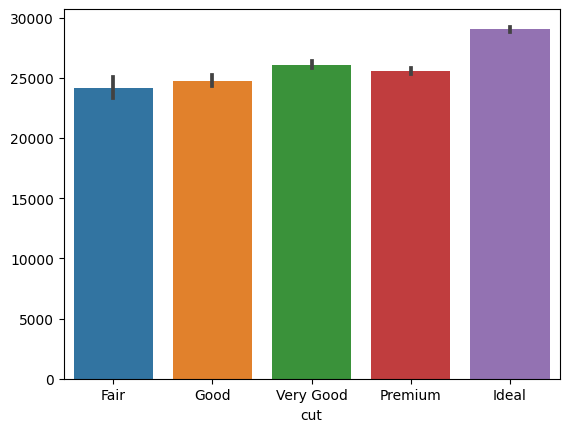

In [13]:
sns.barplot(x= 'cut' , y = df['cut'].index , data= df)
